In [1]:
import sys
sys.path.insert(0, '..')
from src.analysis import *

df = load_flight('652', 1, 1)

['652', '653', '654', '655', '656', '657', '658', '659', '660', '661', '662', '663', '664', '665', '666', '667', '668', '669', '670', '671', '672', '685']
Flight: Tail 652, Batch 1, Flight 1
  Duration: 131.5 minutes
  Max Altitude: 852 ft
  Samples: 31,552
  Signals: 182
  Columns: ['sample_index', 'ABRK', 'ACID', 'ACMT', 'AIL_1', 'AIL_2', 'ALT', 'ALTR', 'ALTS', 'AOA1']...


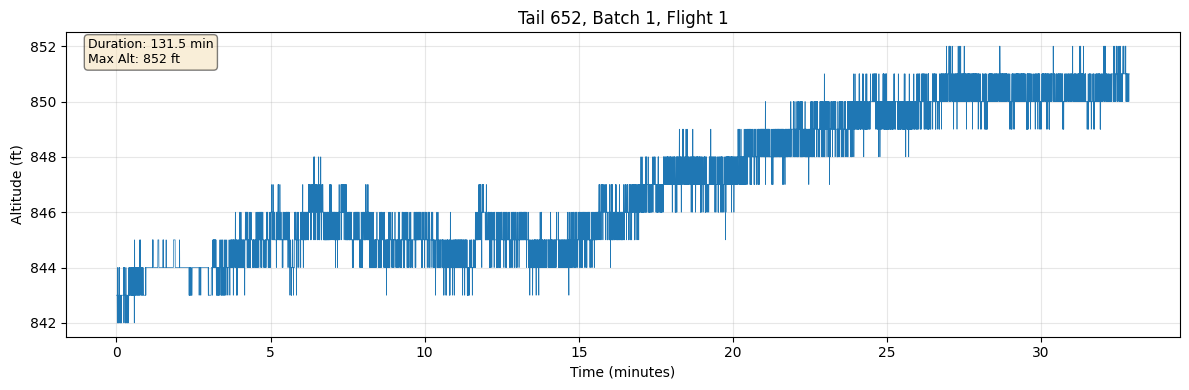

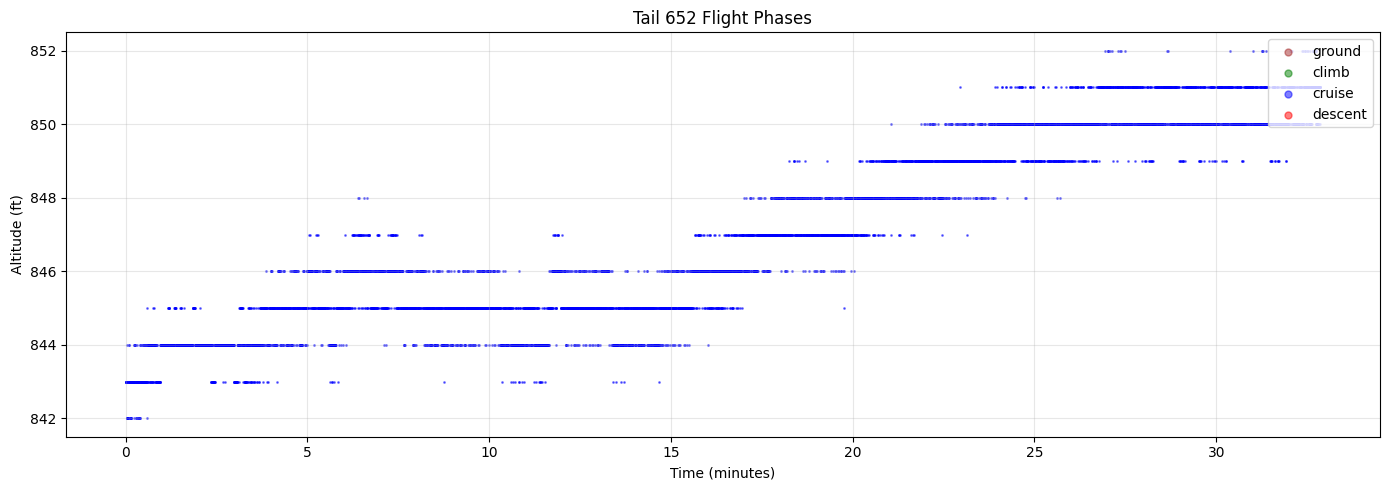

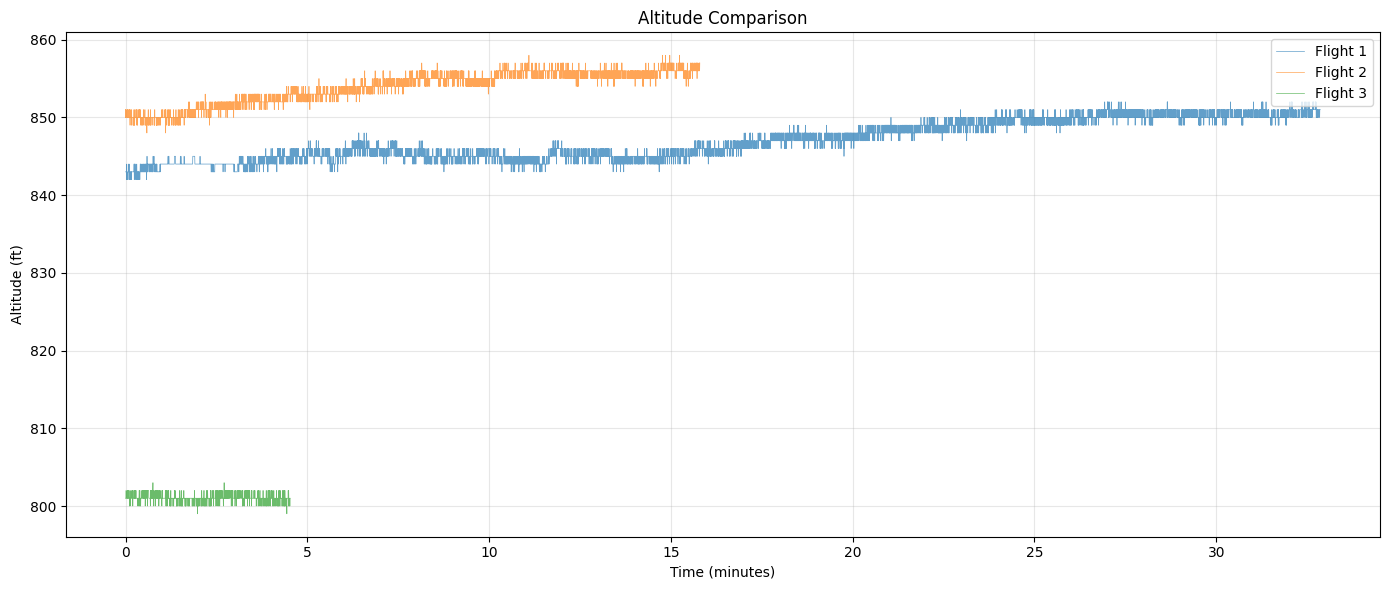

shape: (3, 7)
┌──────────┬───────────────┬──────────────┬──────────────┬──────────────┬────────────┬─────────────┐
│ flight   ┆ duration_minu ┆ max_altitude ┆ min_altitude ┆ mean_altitud ┆ alt_std_ft ┆ num_samples │
│ ---      ┆ tes           ┆ _ft          ┆ _ft          ┆ e_ft         ┆ ---        ┆ ---         │
│ str      ┆ ---           ┆ ---          ┆ ---          ┆ ---          ┆ f64        ┆ i64         │
│          ┆ f64           ┆ f64          ┆ f64          ┆ f64          ┆            ┆             │
╞══════════╪═══════════════╪══════════════╪══════════════╪══════════════╪════════════╪═════════════╡
│ Flight 1 ┆ 131.5         ┆ 852.0        ┆ 842.0        ┆ NaN          ┆ NaN        ┆ 31552       │
│ Flight 2 ┆ 63.2          ┆ 858.0        ┆ 848.0        ┆ NaN          ┆ NaN        ┆ 15168       │
│ Flight 3 ┆ 18.1          ┆ 803.0        ┆ 799.0        ┆ NaN          ┆ NaN        ┆ 4352        │
└──────────┴───────────────┴──────────────┴──────────────┴──────────────┴────

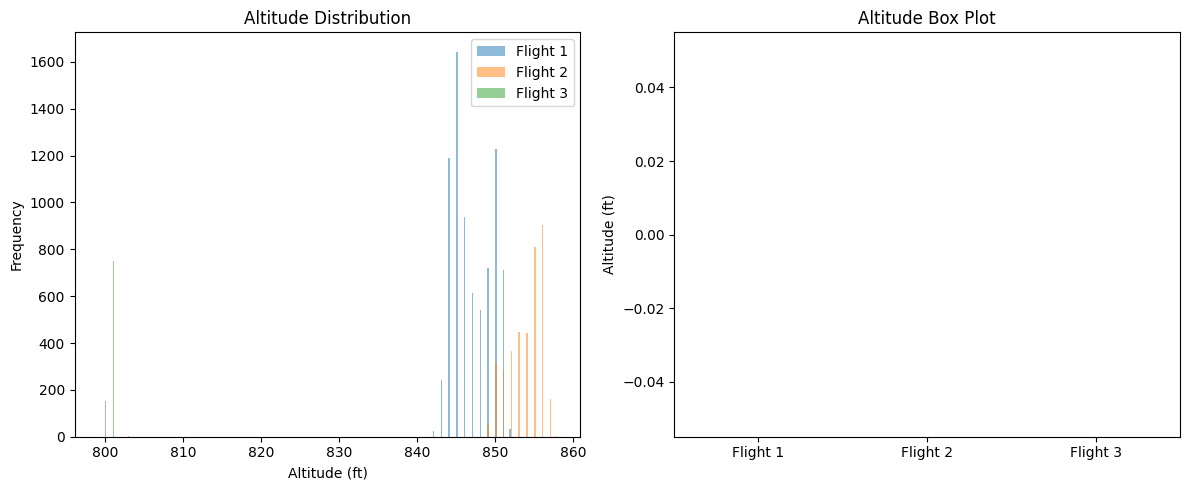

Analyzing Tail 652


[]

In [2]:

# Check what tails are available
print(get_available_tails())

# Quick summary
quick_flight_summary('652', 1, 1)

# Load and plot single flight
df = load_flight('652', 1, 1)
plot_altitude_profile(df, title='Tail 652, Batch 1, Flight 1')
plt.show()

# Plot with flight phases
plot_altitude_with_phases(df, title='Tail 652 Flight Phases')
plt.show()

# Compare multiple flights
flights = [
    ('Flight 1', load_flight('652', 1, 1)),
    ('Flight 2', load_flight('652', 1, 2)),
    ('Flight 3', load_flight('652', 1, 3)),
]
plot_altitude_comparison(flights)
plt.show()

# Compare stats
print(compare_flights_stats(flights))

# Distribution analysis
plot_altitude_distribution(flights)
plt.show()

# Quick tail analysis
analyze_tail('652', max_flights=5)

In [2]:
# =============================================================================
  # Full Fleet Altitude Analysis - All Flights, All Tails
  # =============================================================================

import sys
sys.path.insert(0, '..')
from src.analysis import *
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

# Get all available tails
tails = get_available_tails()
print(f"Available tails: {tails}")

Available tails: ['652', '653', '654', '655', '656', '657', '658', '659', '660', '661', '662', '663', '664', '665', '666', '667', '668', '669', '670', '671']


In [16]:
# =============================================================================
# Load all flights and compute statistics
# =============================================================================

all_flight_stats = []
all_flights_data = []  # For plotting

for tail in tails:
    print(f"\nProcessing tail {tail}...")
    tail_path = get_path('telemetry') / f"tail_number={tail}"

    for pq_file in sorted(tail_path.glob('**/*.parquet')):
        try:
            df = pl.read_parquet(pq_file)

            # Get batch from path
            batch = pq_file.parent.name.replace('batch=', '')
            flight_name = pq_file.stem

            # Calculate stats
            stats = get_flight_stats(df)
            stats['tail'] = tail
            stats['batch'] = batch
            stats['flight'] = flight_name
            stats['flight_id'] = f"{tail}_{batch}_{flight_name}"
            all_flight_stats.append(stats)

            # Store for plotting (tail, duration, max_alt)
            all_flights_data.append({
                'tail': tail,
                'flight_id': stats['flight_id'],
                'duration_minutes': stats['duration_minutes'],
                'max_altitude_ft': stats['max_altitude_ft'],
                'mean_altitude_ft': stats['mean_altitude_ft'],
            })

        except Exception as e:
            print(f"  Error loading {pq_file}: {e}")

print(f"\nLoaded {len(all_flight_stats)} flights total")


Processing tail 652...

Processing tail 653...

Processing tail 654...

Processing tail 655...

Processing tail 656...

Processing tail 657...

Processing tail 658...

Processing tail 659...

Processing tail 660...

Processing tail 661...

Processing tail 662...

Processing tail 663...

Processing tail 664...

Processing tail 665...

Processing tail 666...

Processing tail 667...

Processing tail 668...

Processing tail 669...

Processing tail 670...

Processing tail 671...

Loaded 98383 flights total


In [18]:
# Save to parquet
stats_df = pl.DataFrame(all_flight_stats)
stats_df.write_parquet('../data/processed/flight_altitude_stats.parquet')

In [20]:
# Filter flights where mean_altitude_ft is NaN
stats_df = pl.read_parquet('../data/processed/flight_altitude_stats.parquet')
flights_with_na = stats_df.filter(pl.col('mean_altitude_ft').is_nan())
print(f"Flights with NaN mean_altitude: {len(flights_with_na)}")
print(flights_with_na)

Flights with NaN mean_altitude: 98383
shape: (98_383, 10)
┌─────────────┬─────────────┬────────────┬────────────┬───┬──────┬───────┬────────────┬────────────┐
│ duration_mi ┆ max_altitud ┆ min_altitu ┆ mean_altit ┆ … ┆ tail ┆ batch ┆ flight     ┆ flight_id  │
│ nutes       ┆ e_ft        ┆ de_ft      ┆ ude_ft     ┆   ┆ ---  ┆ ---   ┆ ---        ┆ ---        │
│ ---         ┆ ---         ┆ ---        ┆ ---        ┆   ┆ str  ┆ str   ┆ str        ┆ str        │
│ f64         ┆ f64         ┆ f64        ┆ f64        ┆   ┆      ┆       ┆            ┆            │
╞═════════════╪═════════════╪════════════╪════════════╪═══╪══════╪═══════╪════════════╪════════════╡
│ 131.5       ┆ 852.0       ┆ 842.0      ┆ NaN        ┆ … ┆ 652  ┆ 1     ┆ flight_001 ┆ 652_1_flig │
│             ┆             ┆            ┆            ┆   ┆      ┆       ┆            ┆ ht_001     │
│ 63.2        ┆ 858.0       ┆ 848.0      ┆ NaN        ┆ … ┆ 652  ┆ 1     ┆ flight_002 ┆ 652_1_flig │
│             ┆             ┆    

In [45]:
tail_path = get_path('telemetry') / f"tail_number=653" / "batch=1" / "flight_009.parquet"
tail_path.exists()

df = pl.read_parquet(tail_path)
df.head()
print(f"Total rows: {len(df)}")

# get_flight_stats(df)

# Get row indices where ALT is NaN
na_indices = df.with_row_index().filter(pl.col('ALT').is_nan()).select('index')
print(f"NA count: {len(na_indices)}")
print(f"NA percentage: {len(na_indices) / len(df) * 100:.2f}%")

# Or get the range (min/max index)
if len(na_indices) > 0:
    print(f"First NA at index: {na_indices['index'].min()}")
    print(f"Last NA at index: {na_indices['index'].max()}")

    # Check if they're contiguous
    indices = na_indices['index'].to_list()
    print(f"Contiguous block: {indices == list(range(min(indices), max(indices)+1))}")


Total rows: 44480
NA count: 33360
NA percentage: 75.00%
First NA at index: 11120
Last NA at index: 44479
Contiguous block: True


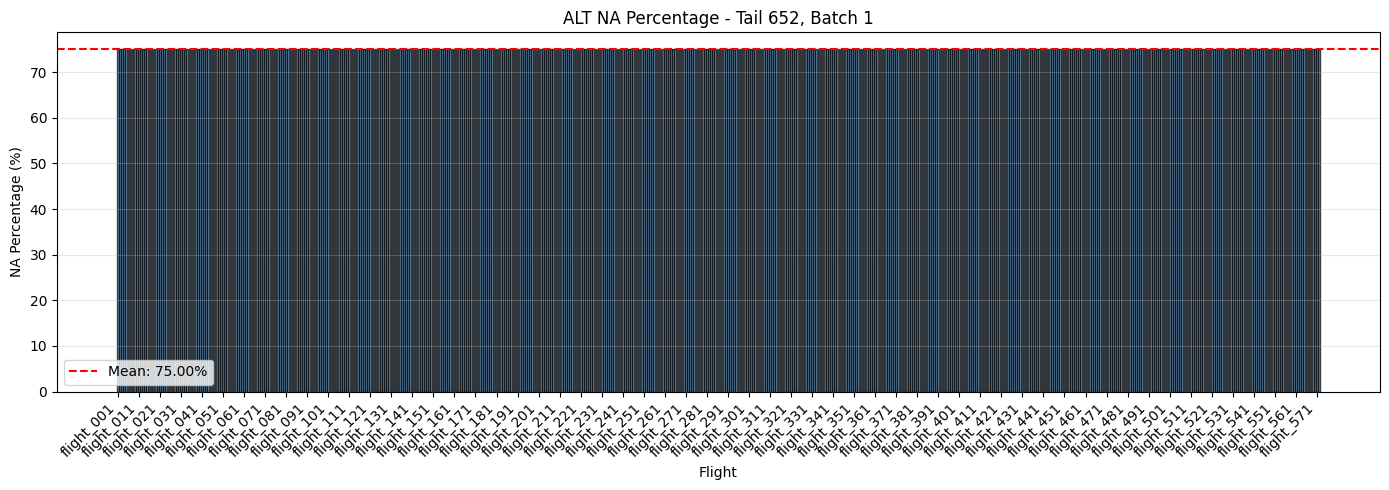

Flights with NAs: 572 / 572
Max NA %: 75.00%


In [46]:
# Plot NA percentage for all flights in tail 652 batch 1
tail_batch_path = get_path('telemetry') / "tail_number=654" / "batch=3"

flight_na_stats = []
for pq_file in sorted(tail_batch_path.glob('*.parquet')):
    df = pl.read_parquet(pq_file, columns=['ALT'])
    na_count = df['ALT'].is_nan().sum()
    total = len(df)
    flight_na_stats.append({
        'flight': pq_file.stem,
        'na_count': na_count,
        'total_rows': total,
        'na_pct': na_count / total * 100
    })

na_df = pl.DataFrame(flight_na_stats)

# Plot
fig, ax = plt.subplots(figsize=(14, 5))
x = range(len(na_df))
ax.bar(x, na_df['na_pct'], color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Flight')
ax.set_ylabel('NA Percentage (%)')
ax.set_title('ALT NA Percentage - Tail 652, Batch 1')
ax.set_xticks(x[::10])  # Show every 10th label to avoid crowding
ax.set_xticklabels(na_df['flight'].to_list()[::10], rotation=45, ha='right')
ax.axhline(y=na_df['na_pct'].mean(), color='red', linestyle='--', label=f"Mean: {na_df['na_pct'].mean():.2f}%")
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print summary
print(f"Flights with NAs: {(na_df['na_pct'] > 0).sum()} / {len(na_df)}")
print(f"Max NA %: {na_df['na_pct'].max():.2f}%")

In [47]:
# Check where ALT data ends vs flight duration
tail_batch_path = get_path('telemetry') / "tail_number=652" / "batch=1"

for pq_file in sorted(tail_batch_path.glob('*.parquet'))[:5]:
    df = pl.read_parquet(pq_file, columns=['ALT'])
    last_valid_idx = df.with_row_index().filter(~pl.col('ALT').is_nan())['index'].max()
    total_rows = len(df)

    # Assuming 4 Hz sampling
    alt_duration_min = last_valid_idx / 4 / 60
    total_duration_min = total_rows / 4 / 60

    print(f"{pq_file.stem}: ALT ends at {alt_duration_min:.1f} min, flight total {total_duration_min:.1f} min")

flight_001: ALT ends at 32.9 min, flight total 131.5 min
flight_002: ALT ends at 15.8 min, flight total 63.2 min
flight_003: ALT ends at 4.5 min, flight total 18.1 min
flight_004: ALT ends at 10.0 min, flight total 40.0 min
flight_005: ALT ends at 7.3 min, flight total 29.1 min


In [ ]:
# This isn't a bug - ALT is genuinely sampled at a lower rate (~1 Hz) while other signals are at 4 Hz, resulting in 1/4 the samples. The 75% NaN is correct behavior.

#   Verify by checking the signal metadata:
import scipy.io

mat_file = '../data/raw/Tail_672_1/672200104111150.mat'
mat_data = scipy.io.loadmat(mat_file, squeeze_me=True, struct_as_record=False)

# Check ALT rate vs another signal
alt = mat_data['ALT']
print(f"ALT rate: {alt.Rate} Hz, samples: {len(alt.data)}")

# Compare to a 4Hz signal
for name in ['EGT_1', 'N1_1', 'FF_1']:
    if name in mat_data:
        sig = mat_data[name]
        print(f"{name} rate: {sig.Rate} Hz, samples: {len(sig.data)}")
        break

ALT rate: 4 Hz, samples: 39616
EGT_1 rate: 4 Hz, samples: 39616


In [52]:
# Check what signal has the most samples:

import scipy.io

mat_file = '../data/raw/Tail_672_1/672200104111150.mat'
mat_data = scipy.io.loadmat(mat_file, squeeze_me=True, struct_as_record=False)

# Find all signals and their lengths
signal_lengths = []
for name, value in mat_data.items():
    if name.startswith('__'):
        continue
    if hasattr(value, '__dict__') and hasattr(value, 'data'):
        length = len(value.data) if hasattr(value.data, '__len__') else 0
        rate = getattr(value, 'Rate', None)
        signal_lengths.append((name, length, rate))

# Sort by length descending
signal_lengths.sort(key=lambda x: x[1], reverse=True)

print("Top 10 signals by sample count:")
for name, length, rate in signal_lengths[:10]:
    print(f"  {name}: {length:,} samples, {rate} Hz")

print(f"\nBottom 5 signals:")
for name, length, rate in signal_lengths[-5:]:
    print(f"  {name}: {length:,} samples, {rate} Hz")

Top 10 signals by sample count:
  FPAC: 158,464 samples, 16 Hz
  BLAC: 158,464 samples, 16 Hz
  CTAC: 158,464 samples, 16 Hz
  IVV: 158,464 samples, 16 Hz
  RALT: 79,232 samples, 8 Hz
  PTCH: 79,232 samples, 8 Hz
  ROLL: 79,232 samples, 8 Hz
  VRTG: 79,232 samples, 8 Hz
  TH: 39,616 samples, 4 Hz
  MH: 39,616 samples, 4 Hz

Bottom 5 signals:
  EHRS_4: 2,476 samples, 0.25 Hz
  EHRS_3: 2,476 samples, 0.25 Hz
  EHRS_2: 2,476 samples, 0.25 Hz
  ESN_1: 2,476 samples, 0.25 Hz
  ESN_2: 2,476 samples, 0.25 Hz


In [53]:
import scipy.io
from pathlib import Path
from collections import defaultdict

# Load one MAT file to analyze signal structure
mat_file = list(Path('../data/raw').glob('**/*.mat'))[0]  # Adjust path
mat_data = scipy.io.loadmat(str(mat_file), squeeze_me=True, struct_as_record=False)

# Collect signal info
signals_info = []
for name, value in mat_data.items():
    if name.startswith('__'):
        continue
    if hasattr(value, '__dict__') and hasattr(value, 'data'):
        signals_info.append({
            'signal': name,
            'rate_hz': getattr(value, 'Rate', None),
            'samples': len(value.data) if hasattr(value.data, '__len__') else 0,
            'units': str(getattr(value, 'Units', '')),
            'description': str(getattr(value, 'Description', ''))[:60],
        })

signals_df = pl.DataFrame(signals_info).sort('rate_hz', descending=True)
print(f"Total signals: {len(signals_df)}")
print(signals_df)

# Group by sampling rate
rate_summary = signals_df.group_by('rate_hz').agg([
    pl.len().alias('count'),
    pl.col('signal').alias('signals')
]).sort('rate_hz', descending=True)

print("\nSignals by sampling rate:")
for row in rate_summary.iter_rows(named=True):
    print(f"\n{row['rate_hz']} Hz ({row['count']} signals):")
    print(f"  {', '.join(row['signals'][:10])}")
    if len(row['signals']) > 10:
        print(f"  ... and {len(row['signals']) - 10} more")

Total signals: 186
shape: (186, 5)
┌────────┬─────────┬─────────┬────────┬────────────────────────────────┐
│ signal ┆ rate_hz ┆ samples ┆ units  ┆ description                    │
│ ---    ┆ ---     ┆ ---     ┆ ---    ┆ ---                            │
│ str    ┆ f64     ┆ i64     ┆ str    ┆ str                            │
╞════════╪═════════╪═════════╪════════╪════════════════════════════════╡
│ FPAC   ┆ 16.0    ┆ 43648   ┆ G      ┆ FLIGHT PATH ACCELERATION       │
│ BLAC   ┆ 16.0    ┆ 43648   ┆ G      ┆ BODY LONGITUDINAL ACCELERATION │
│ CTAC   ┆ 16.0    ┆ 43648   ┆ G      ┆ CROSS TRACK ACCELERATION       │
│ IVV    ┆ 16.0    ┆ 43648   ┆ FT/MIN ┆ INERTIAL VERTICAL SPEED LSP    │
│ RALT   ┆ 8.0     ┆ 21824   ┆ FEET   ┆ RADIO ALTITUDE LSP             │
│ …      ┆ …       ┆ …       ┆ …      ┆ …                              │
│ EHRS_4 ┆ 0.25    ┆ 682     ┆ HOURS  ┆ ENGINE HOURS 4 LSP             │
│ EHRS_3 ┆ 0.25    ┆ 682     ┆ HOURS  ┆ ENGINE HOURS 3 LSP             │
│ EHRS_2 ┆ 0.25 

In [56]:
# Recommended Signal Set for Anomaly Detection

RECOMMENDED_SIGNALS = {
    # Engine (high priority - failures are critical)
    'engine': ['N1_1', 'N1_2', 'N2_1', 'N2_2', 'EGT_1', 'EGT_2', 'FF_1', 'FF_2'],

    # Flight dynamics (high priority - safety critical)
    'attitude': ['PTCH', 'ROLL'],
    'accelerations': ['VRTG', 'FPAC', 'BLAC', 'CTAC'],

    # Altitude/vertical (high priority)
    'vertical': ['ALT', 'RALT', 'IVV'],

    # Speed (high priority - stall/overspeed)
    'speed': ['CAS', 'TAS', 'MACH', 'GS'],

    # Control surfaces (medium priority)
    'controls': ['ELEV', 'AIL_1', 'RUDD', 'STAB'],

    # Configuration (context)
    'config': ['FLAP', 'GW'],  # flap position, gross weight
}

# Flatten for processing
ALL_RECOMMENDED = [sig for sigs in RECOMMENDED_SIGNALS.values() for sig in sigs]
print(f"Recommended signals: {len(ALL_RECOMMENDED)}")

#   Check Which Recommended Signals Exist in Your Data

available = set(signals_df['signal'].to_list())
recommended = set(ALL_RECOMMENDED)

present = recommended & available
missing = recommended - available

print(f"Recommended signals present: {len(present)}/{len(recommended)}")
print(f"\nPresent: {sorted(present)}")
print(f"\nMissing: {sorted(missing)}")

# Show rates for present signals
present_df = signals_df.filter(pl.col('signal').is_in(list(present)))
print("\nRecommended signals with rates:")
print(present_df.select(['signal', 'rate_hz', 'units']).sort('signal'))

Recommended signals: 27
Recommended signals present: 24/27

Present: ['AIL_1', 'ALT', 'BLAC', 'CAS', 'CTAC', 'EGT_1', 'EGT_2', 'FF_1', 'FF_2', 'FLAP', 'FPAC', 'GS', 'IVV', 'MACH', 'N1_1', 'N1_2', 'N2_1', 'N2_2', 'PTCH', 'RALT', 'ROLL', 'RUDD', 'TAS', 'VRTG']

Missing: ['ELEV', 'GW', 'STAB']

Recommended signals with rates:
shape: (24, 3)
┌────────┬─────────┬───────┐
│ signal ┆ rate_hz ┆ units │
│ ---    ┆ ---     ┆ ---   │
│ str    ┆ f64     ┆ str   │
╞════════╪═════════╪═══════╡
│ AIL_1  ┆ 1.0     ┆ DEG   │
│ ALT    ┆ 4.0     ┆ FEET  │
│ BLAC   ┆ 16.0    ┆ G     │
│ CAS    ┆ 4.0     ┆ KNOTS │
│ CTAC   ┆ 16.0    ┆ G     │
│ …      ┆ …       ┆ …     │
│ RALT   ┆ 8.0     ┆ FEET  │
│ ROLL   ┆ 8.0     ┆ DEG   │
│ RUDD   ┆ 2.0     ┆ DEG   │
│ TAS    ┆ 4.0     ┆ KNOTS │
│ VRTG   ┆ 8.0     ┆ G     │
└────────┴─────────┴───────┘


In [ ]:
# =============================================================================
# Summary Statistics DataFrame
# =============================================================================

# stats_df = pl.DataFrame(all_flight_stats)
stats_df = pl.read_parquet('data/processed/flight_altitude_stats.parquet')
print("\n" + "="*60)
print("SUMMARY STATISTICS - ALL FLIGHTS")
print("="*60)

# Overall stats
print(f"\nTotal flights: {len(stats_df)}")
print(f"Total tails: {stats_df['tail'].n_unique()}")

print("\n--- Duration (minutes) ---")
print(f"  Mean:   {stats_df['duration_minutes'].mean():.1f}")
print(f"  Std:    {stats_df['duration_minutes'].std():.1f}")
print(f"  Min:    {stats_df['duration_minutes'].min():.1f}")
print(f"  Max:    {stats_df['duration_minutes'].max():.1f}")
print(f"  Median: {stats_df['duration_minutes'].median():.1f}")

print("\n--- Max Altitude (ft) ---")
print(f"  Mean:   {stats_df['max_altitude_ft'].mean():,.0f}")
print(f"  Std:    {stats_df['max_altitude_ft'].std():,.0f}")
print(f"  Min:    {stats_df['max_altitude_ft'].min():,.0f}")
print(f"  Max:    {stats_df['max_altitude_ft'].max():,.0f}")
print(f"  Median: {stats_df['max_altitude_ft'].median():,.0f}")

print("\n--- Mean Altitude (ft) ---")
print(f"  Mean:   {stats_df['mean_altitude_ft'].mean():,.0f}")
print(f"  Std:    {stats_df['mean_altitude_ft'].std():,.0f}")
print(f"  Min:    {stats_df['mean_altitude_ft'].min():,.0f}")
print(f"  Max:    {stats_df['mean_altitude_ft'].max():,.0f}")

# Stats by tail
print("\n" + "="*60)
print("STATISTICS BY TAIL")
print("="*60)
tail_stats = stats_df.group_by('tail').agg([
    pl.count().alias('num_flights'),
    pl.col('duration_minutes').mean().alias('avg_duration_min'),
    pl.col('duration_minutes').sum().alias('total_flight_time_min'),
    pl.col('max_altitude_ft').mean().alias('avg_max_alt_ft'),
    pl.col('max_altitude_ft').max().alias('highest_alt_ft'),
]).sort('tail')

print(tail_stats)


SUMMARY STATISTICS - ALL FLIGHTS

Total flights: 98383
Total tails: 20

--- Duration (minutes) ---
  Mean:   327.7
  Std:    183.0
  Min:    0.3
  Max:    1217.3
  Median: 314.1

--- Max Altitude (ft) ---
  Mean:   21,410
  Std:    10,564
  Min:    -574
  Max:    35,417
  Median: 25,030

--- Mean Altitude (ft) ---
  Mean:   nan
  Std:    nan
  Min:    nan
  Max:    nan

STATISTICS BY TAIL
shape: (20, 6)
┌──────┬─────────────┬──────────────────┬───────────────────────┬────────────────┬────────────────┐
│ tail ┆ num_flights ┆ avg_duration_min ┆ total_flight_time_min ┆ avg_max_alt_ft ┆ highest_alt_ft │
│ ---  ┆ ---         ┆ ---              ┆ ---                   ┆ ---            ┆ ---            │
│ str  ┆ u32         ┆ f64              ┆ f64                   ┆ f64            ┆ f64            │
╞══════╪═════════════╪══════════════════╪═══════════════════════╪════════════════╪════════════════╡
│ 652  ┆ 4430        ┆ 331.261309       ┆ 1.4675e6              ┆ 20990.160045   ┆ 33043.0  

/var/folders/hl/yslt75wx4rvbhykdtftvhjzw0000gn/T/ipykernel_48951/1270932124.py:39: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias('num_flights'),


/var/folders/hl/yslt75wx4rvbhykdtftvhjzw0000gn/T/ipykernel_48951/2696115426.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(tail_data, labels=sorted(tails_unique), patch_artist=True)


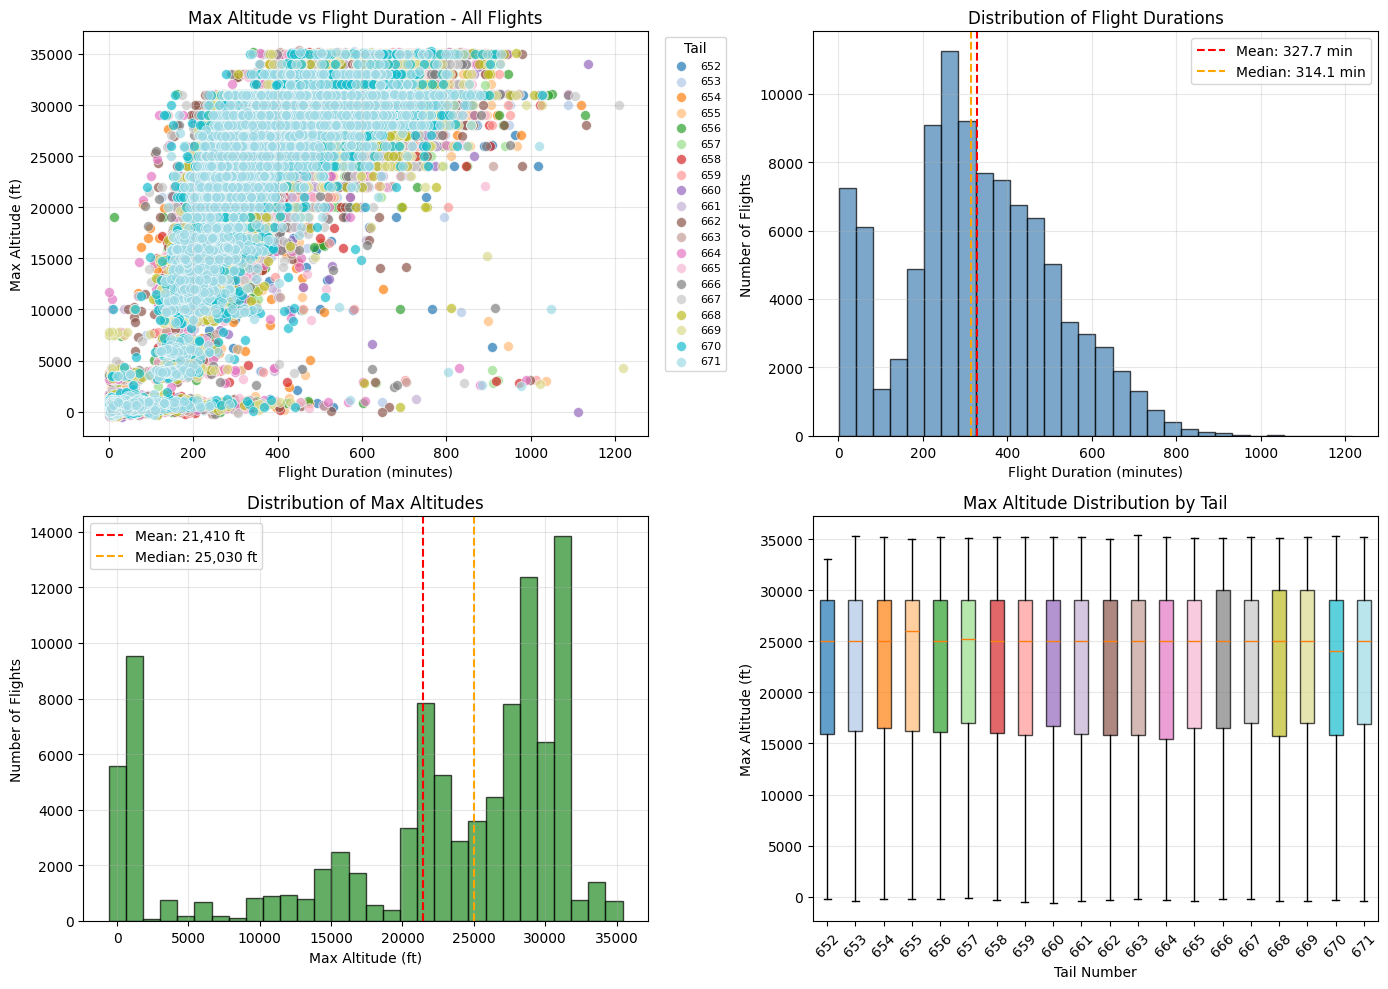

In [7]:
# =============================================================================
# Plot: Max Altitude vs Flight Duration (All Flights)
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Convert to pandas for plotting
plot_df = pl.DataFrame(all_flights_data).to_pandas()

# Plot 1: Scatter - Max Altitude vs Duration (colored by tail)
ax1 = axes[0, 0]
tails_unique = plot_df['tail'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(tails_unique)))
color_map = dict(zip(tails_unique, colors))

for tail in tails_unique:
    mask = plot_df['tail'] == tail
    ax1.scatter(plot_df.loc[mask, 'duration_minutes'],
                plot_df.loc[mask, 'max_altitude_ft'],
                c=[color_map[tail]], label=tail, alpha=0.7, s=50, edgecolors='white', linewidth=0.5)

ax1.set_xlabel('Flight Duration (minutes)')
ax1.set_ylabel('Max Altitude (ft)')
ax1.set_title('Max Altitude vs Flight Duration - All Flights')
ax1.legend(title='Tail', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)
ax1.grid(True, alpha=0.3)

# Plot 2: Histogram of Flight Durations
ax2 = axes[0, 1]
ax2.hist(plot_df['duration_minutes'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
ax2.axvline(plot_df['duration_minutes'].mean(), color='red', linestyle='--', label=f"Mean: {plot_df['duration_minutes'].mean():.1f} min")
ax2.axvline(plot_df['duration_minutes'].median(), color='orange', linestyle='--', label=f"Median: {plot_df['duration_minutes'].median():.1f} min")
ax2.set_xlabel('Flight Duration (minutes)')
ax2.set_ylabel('Number of Flights')
ax2.set_title('Distribution of Flight Durations')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Histogram of Max Altitudes
ax3 = axes[1, 0]
ax3.hist(plot_df['max_altitude_ft'], bins=30, edgecolor='black', alpha=0.7, color='forestgreen')
ax3.axvline(plot_df['max_altitude_ft'].mean(), color='red', linestyle='--', label=f"Mean: {plot_df['max_altitude_ft'].mean():,.0f} ft")
ax3.axvline(plot_df['max_altitude_ft'].median(), color='orange', linestyle='--', label=f"Median: {plot_df['max_altitude_ft'].median():,.0f} ft")
ax3.set_xlabel('Max Altitude (ft)')
ax3.set_ylabel('Number of Flights')
ax3.set_title('Distribution of Max Altitudes')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Box plots by tail
ax4 = axes[1, 1]
tail_data = [plot_df[plot_df['tail'] == t]['max_altitude_ft'].values for t in sorted(tails_unique)]
bp = ax4.boxplot(tail_data, labels=sorted(tails_unique), patch_artist=True)
for patch, color in zip(bp['boxes'], plt.cm.tab20(np.linspace(0, 1, len(tails_unique)))):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax4.set_xlabel('Tail Number')
ax4.set_ylabel('Max Altitude (ft)')
ax4.set_title('Max Altitude Distribution by Tail')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [8]:
# =============================================================================
# Display full statistics table
# =============================================================================

print("\n" + "="*60)
print("FULL FLIGHT STATISTICS TABLE")
print("="*60)
print(stats_df.select(['tail', 'batch', 'flight', 'duration_minutes', 'max_altitude_ft', 'mean_altitude_ft', 'alt_std_ft']))


FULL FLIGHT STATISTICS TABLE
shape: (98_383, 7)
┌──────┬───────┬────────────┬──────────────────┬─────────────────┬──────────────────┬────────────┐
│ tail ┆ batch ┆ flight     ┆ duration_minutes ┆ max_altitude_ft ┆ mean_altitude_ft ┆ alt_std_ft │
│ ---  ┆ ---   ┆ ---        ┆ ---              ┆ ---             ┆ ---              ┆ ---        │
│ str  ┆ str   ┆ str        ┆ f64              ┆ f64             ┆ f64              ┆ f64        │
╞══════╪═══════╪════════════╪══════════════════╪═════════════════╪══════════════════╪════════════╡
│ 652  ┆ 1     ┆ flight_001 ┆ 131.5            ┆ 852.0           ┆ NaN              ┆ NaN        │
│ 652  ┆ 1     ┆ flight_002 ┆ 63.2             ┆ 858.0           ┆ NaN              ┆ NaN        │
│ 652  ┆ 1     ┆ flight_003 ┆ 18.1             ┆ 803.0           ┆ NaN              ┆ NaN        │
│ 652  ┆ 1     ┆ flight_004 ┆ 40.0             ┆ 718.0           ┆ NaN              ┆ NaN        │
│ 652  ┆ 1     ┆ flight_005 ┆ 29.1             ┆ 711.0      

In [9]:
# =============================================================================
# NaN Analysis - Understanding Missing Data Patterns
# =============================================================================

import sys
sys.path.insert(0, '..')
from src.analysis import *
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

# =============================================================================
# Load a sample flight to understand structure
# =============================================================================

tails = get_available_tails()
print(f"Available tails: {tails}\n")

# Load one flight to see columns
sample_df = load_flight(tails[0], 1, 1)
print(f"Total columns: {len(sample_df.columns)}")
print(f"Total rows: {len(sample_df):,}")

# =============================================================================
# Analyze NaN presence in a single flight
# =============================================================================

def analyze_nans_single_flight(df: pl.DataFrame, flight_id: str = ""):
    """Analyze NaN patterns in a single flight DataFrame."""
    results = []

    for col in df.columns:
        null_count = df[col].null_count()
        total = len(df)
        null_pct = (null_count / total) * 100

        # Check for NaN in float columns (different from null)
        nan_count = 0
        if df[col].dtype in [pl.Float32, pl.Float64]:
            nan_count = df.filter(pl.col(col).is_nan()).height

        results.append({
            'column': col,
            'dtype': str(df[col].dtype),
            'null_count': null_count,
            'nan_count': nan_count,
            'total_missing': null_count + nan_count,
            'missing_pct': (null_count + nan_count) / total * 100,
            'total_rows': total,
        })

    return pl.DataFrame(results)

print("\n" + "="*60)
print("NaN ANALYSIS - SAMPLE FLIGHT")
print("="*60)

nan_analysis = analyze_nans_single_flight(sample_df, f"{tails[0]}_1_1")

# Show columns with any missing data
cols_with_missing = nan_analysis.filter(pl.col('total_missing') > 0)
print(f"\nColumns with missing data: {len(cols_with_missing)} / {len(nan_analysis)}")

if len(cols_with_missing) > 0:
    print("\nColumns with missing values:")
    print(cols_with_missing.sort('missing_pct', descending=True))
else:
    print("No missing data found in this flight!")


Available tails: ['652', '653', '654', '655', '656', '657', '658', '659', '660', '661', '662', '663', '664', '665', '666', '667', '668', '669', '670', '671']

Total columns: 183
Total rows: 31,552

NaN ANALYSIS - SAMPLE FLIGHT

Columns with missing data: 178 / 183

Columns with missing values:
shape: (178, 7)
┌────────────┬─────────┬────────────┬───────────┬───────────────┬─────────────┬────────────┐
│ column     ┆ dtype   ┆ null_count ┆ nan_count ┆ total_missing ┆ missing_pct ┆ total_rows │
│ ---        ┆ ---     ┆ ---        ┆ ---       ┆ ---           ┆ ---         ┆ ---        │
│ str        ┆ str     ┆ i64        ┆ i64       ┆ i64           ┆ f64         ┆ i64        │
╞════════════╪═════════╪════════════╪═══════════╪═══════════════╪═════════════╪════════════╡
│ ACID       ┆ Float32 ┆ 0          ┆ 31059     ┆ 31059         ┆ 98.4375     ┆ 31552      │
│ DATE_DAY   ┆ Float32 ┆ 0          ┆ 31059     ┆ 31059         ┆ 98.4375     ┆ 31552      │
│ DATE_MONTH ┆ Float32 ┆ 0          ┆ 

In [10]:
# =============================================================================
# Analyze NaN patterns across ALL flights
# =============================================================================

print("\n" + "="*60)
print("NaN ANALYSIS - ALL FLIGHTS")
print("="*60)

all_nan_stats = []
flight_level_stats = []

for tail in tails:
    print(f"Processing tail {tail}...")
    tail_path = get_path('telemetry') / f"tail_number={tail}"

    for pq_file in sorted(tail_path.glob('**/*.parquet')):
        try:
            df = pl.read_parquet(pq_file)
            batch = pq_file.parent.name.replace('batch=', '')
            flight_name = pq_file.stem
            flight_id = f"{tail}_{batch}_{flight_name}"

            # Per-column stats for this flight
            for col in df.columns:
                null_count = df[col].null_count()
                nan_count = 0
                if df[col].dtype in [pl.Float32, pl.Float64]:
                    nan_count = df.filter(pl.col(col).is_nan()).height

                total_missing = null_count + nan_count
                if total_missing > 0:
                    all_nan_stats.append({
                        'flight_id': flight_id,
                        'tail': tail,
                        'column': col,
                        'null_count': null_count,
                        'nan_count': nan_count,
                        'total_missing': total_missing,
                        'total_rows': len(df),
                        'missing_pct': total_missing / len(df) * 100,
                    })

            # Flight-level summary
            total_cells = len(df) * len(df.columns)
            total_missing = sum(
                df[col].null_count() + (df.filter(pl.col(col).is_nan()).height if df[col].dtype in [pl.Float32, pl.Float64] else 0)
                for col in df.columns
            )

            # Check ALT specifically
            alt_null = df['ALT'].null_count() if 'ALT' in df.columns else 0
            alt_nan = df.filter(pl.col('ALT').is_nan()).height if 'ALT' in df.columns and df['ALT'].dtype in [pl.Float32, pl.Float64] else 0

            flight_level_stats.append({
                'flight_id': flight_id,
                'tail': tail,
                'total_rows': len(df),
                'total_columns': len(df.columns),
                'total_cells': total_cells,
                'total_missing': total_missing,
                'missing_pct': total_missing / total_cells * 100,
                'ALT_missing': alt_null + alt_nan,
                'ALT_missing_pct': (alt_null + alt_nan) / len(df) * 100 if len(df) > 0 else 0,
            })

        except Exception as e:
            print(f"  Error: {pq_file}: {e}")


NaN ANALYSIS - ALL FLIGHTS
Processing tail 652...
Processing tail 653...
Processing tail 654...
Processing tail 655...
Processing tail 656...
Processing tail 657...
Processing tail 658...
Processing tail 659...
Processing tail 660...
Processing tail 661...
Processing tail 662...
Processing tail 663...
Processing tail 664...
Processing tail 665...
Processing tail 666...
Processing tail 667...
Processing tail 668...
Processing tail 669...
Processing tail 670...
Processing tail 671...


In [3]:
# =============================================================================
# Analyze NAs in Altitude Data Across All Tails
# =============================================================================

na_analysis = []

for tail in tails:
    tail_path = get_path('telemetry') / f"tail_number={tail}"

    for pq_file in sorted(tail_path.glob('**/*.parquet')):
        try:
            df = pl.read_parquet(pq_file)

            batch = pq_file.parent.name.replace('batch=', '')
            flight_name = pq_file.stem

            alt_series = df['ALT']
            total_rows = len(alt_series)
            na_count = alt_series.null_count()
            na_pct = (na_count / total_rows) * 100 if total_rows > 0 else 0

            na_analysis.append({
                'tail': tail,
                'batch': batch,
                'flight': flight_name,
                'total_samples': total_rows,
                'alt_na_count': na_count,
                'alt_na_pct': na_pct,
                'has_na': na_count > 0
            })
        except Exception as e:
            print(f"Error: {pq_file}: {e}")

na_df = pl.DataFrame(na_analysis)

# Summary by tail
print("="*60)
print("NA ANALYSIS BY TAIL")
print("="*60)
tail_na_summary = na_df.group_by('tail').agg([
    pl.len().alias('total_flights'),
    pl.col('has_na').sum().alias('flights_with_na'),
    pl.col('alt_na_count').sum().alias('total_na_samples'),
    pl.col('alt_na_pct').mean().alias('avg_na_pct'),
    pl.col('alt_na_pct').max().alias('max_na_pct'),
]).sort('tail')

print(tail_na_summary)

# Overall summary
print(f"\nTotal flights: {len(na_df)}")
print(f"Flights with NAs: {na_df['has_na'].sum()}")
print(f"Tails with NAs: {na_df.filter(pl.col('has_na')).select('tail').n_unique()}")

# Distribution of NA percentages for flights that have NAs
flights_with_na = na_df.filter(pl.col('has_na'))
if len(flights_with_na) > 0:
    print(f"\nFor flights WITH NAs:")
    print(f"  Mean NA %: {flights_with_na['alt_na_pct'].mean():.2f}%")
    print(f"  Max NA %:  {flights_with_na['alt_na_pct'].max():.2f}%")
    print(f"  Min NA %:  {flights_with_na['alt_na_pct'].min():.4f}%")


KeyboardInterrupt: 

In [6]:
# The path structure is: telemetry/tail_number=XXX/batch=X/flight_XXX.parquet
# Need to use the correct glob pattern

from pathlib import Path

telemetry_path = get_path('telemetry')

# Check what the glob finds first
files = list(telemetry_path.glob("tail_number=*/batch=*/*.parquet"))
print(f"Found {len(files)} parquet files")

# NA stats per tail (using hive partitioning)
# This will automatically pick up tail_number from directory structure
all_flights = pl.scan_parquet(
    telemetry_path / "tail_number=*" / "batch=*" / "*.parquet",
    hive_partitioning=True
).select([
    'tail_number',
    pl.col('ALT').is_null().alias('is_na'),
]).group_by('tail_number').agg([
    pl.len().alias('total_samples'),
    pl.col('is_na').sum().alias('na_count'),
]).collect()

all_flights = all_flights.with_columns(
    (pl.col('na_count') / pl.col('total_samples') * 100).alias('na_pct')
).sort('tail_number')

print(all_flights)

Found 98383 parquet files



thread 'polars-2' (191159) panicked at crates/polars-core/src/chunked_array/ops/chunkops.rs:152:13:
Polars' maximum length reached. Consider installing 'polars[rt64]'.
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace

thread 'polars-0' (191157) panicked at crates/polars-core/src/chunked_array/ops/chunkops.rs:152:13:
Polars' maximum length reached. Consider installing 'polars[rt64]'.


PanicException: Polars' maximum length reached. Consider installing 'polars[rt64]'.

In [7]:
# Check one random file to understand the pattern
# Quick diagnostic on a single flight
df = pl.read_parquet(next((get_path('telemetry') / "tail_number=652").glob('**/*.parquet')))
print(f"Columns: {df.columns}")
print(f"ALT nulls: {df['ALT'].null_count()} / {len(df)}")
print(df.select(pl.all().null_count()))  # NA count for ALL columns

Columns: ['sample_index', 'ABRK', 'ACID', 'ACMT', 'AIL_1', 'AIL_2', 'ALT', 'ALTR', 'ALTS', 'AOA1', 'AOA2', 'AOAC', 'AOAI', 'APFD', 'APUF', 'ATEN', 'A_T', 'BAL1', 'BAL2', 'BLAC', 'BLV', 'BPGR_1', 'BPGR_2', 'BPYR_1', 'BPYR_2', 'CALT', 'CAS', 'CASM', 'CASS', 'CCPC', 'CCPF', 'CRSS', 'CTAC', 'CWPC', 'CWPF', 'DA', 'DATE_DAY', 'DATE_MONTH', 'DATE_YEAR', 'DFGS', 'DVER_1', 'DVER_2', 'DWPT', 'EAI', 'ECYC_1', 'ECYC_2', 'ECYC_3', 'ECYC_4', 'EGT_1', 'EGT_2', 'EGT_3', 'EGT_4', 'EHRS_1', 'EHRS_2', 'EHRS_3', 'EHRS_4', 'ELEV_1', 'ELEV_2', 'ESN_1', 'ESN_2', 'ESN_3', 'ESN_4', 'EVNT', 'FADF', 'FADS', 'FF_1', 'FF_2', 'FF_3', 'FF_4', 'FGC3', 'FIRE_1', 'FIRE_2', 'FIRE_3', 'FIRE_4', 'FLAP', 'FPAC', 'FQTY_1', 'FQTY_2', 'FQTY_3', 'FQTY_4', 'FRMC', 'GLS', 'GMT_HOUR', 'GMT_MINUTE', 'GMT_SEC', 'GPWS', 'GS', 'HDGS', 'HF1', 'HF2', 'HYDG', 'HYDY', 'ILSF', 'IVV', 'LATG', 'LATP', 'LGDN', 'LGUP', 'LMOD', 'LOC', 'LONG', 'LONP', 'MACH', 'MH', 'MNS', 'MRK', 'MSQT_1', 'MSQT_2', 'MW', 'N1C', 'N1CO', 'N1T', 'N1_1', 'N1_2', 'N

In [8]:
# Sample a few flights per tail
# Quick sample: 5 flights per tail
na_sample = []
for tail in tails:
    tail_path = get_path('telemetry') / f"tail_number={tail}"
    files = list(tail_path.glob('**/*.parquet'))[:5]  # Just 5 per tail

    for pq_file in files:
        df = pl.read_parquet(pq_file, columns=['ALT'])  # Only load ALT column
        na_sample.append({
            'tail': tail,
            'na_pct': df['ALT'].null_count() / len(df) * 100
        })

sample_df = pl.DataFrame(na_sample)
print(sample_df.group_by('tail').agg(pl.col('na_pct').mean()).sort('tail'))

shape: (20, 2)
┌──────┬────────┐
│ tail ┆ na_pct │
│ ---  ┆ ---    │
│ str  ┆ f64    │
╞══════╪════════╡
│ 652  ┆ 0.0    │
│ 653  ┆ 0.0    │
│ 654  ┆ 0.0    │
│ 655  ┆ 0.0    │
│ 656  ┆ 0.0    │
│ …    ┆ …      │
│ 667  ┆ 0.0    │
│ 668  ┆ 0.0    │
│ 669  ┆ 0.0    │
│ 670  ┆ 0.0    │
│ 671  ┆ 0.0    │
└──────┴────────┘


In [15]:
# =============================================================================
# Sample random flights per tail to check for NAs in altitude data
# =============================================================================
import random

na_sample = []
for tail in tails:
    tail_path = get_path('telemetry') / f"tail_number={tail}"
    all_files = list(tail_path.glob('**/*.parquet'))
    files = random.sample(all_files, min(1825, len(all_files)))  # Random 5 per tail

    for pq_file in files:
        df = pl.read_parquet(pq_file, columns=['ALT'])  # Only load ALT column
        na_sample.append({
            'tail': tail,
            'na_pct': df['ALT'].null_count() / len(df) * 100
        })

sample_df = pl.DataFrame(na_sample)
tail_na_avg = sample_df.group_by('tail').agg(pl.col('na_pct').mean()).sort('tail')

# Only show tails with NA percentage > 0
tails_with_na = tail_na_avg.filter(pl.col('na_pct') > 0)

if len(tails_with_na) > 0:
    print("Tails with NAs in ALT column:")
    print(tails_with_na)
else:
    print("No tails have NAs in the sampled flights")

No tails have NAs in the sampled flights
